## User Knowledge Classification Model Proposal
##### Group 41: Daeun (Kelly) Lee, Jessie Megan, Mia (Ziqing) Ling, Renee Chan

### 1. Introduction

<p style='text-align:justify;'> 
Various factors can play a significant role in a student’s knowledge level. Understanding the attributes that contribute to knowledge levels can help improve a student’s academic success. In this project, the following question will be answered: what is the predicted knowledge level of a user given their degree of study time for goal object materials (STG) and the exam performance of the user for goal objects (PEG)?
<br><br>
This project utilizes the User Knowledge Modeling Dataset to predict the knowledge level of a user (UNS) through a classification model created with the k-nearest neighbor algorithm. This dataset examines a group of student’s knowledge pertaining to the subject of Electrical DC machines. The knowledge level can be classified as “Very Low”, “Low” , “Middle”, and “High”. 
</p>

### 2. Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

Attribute Information: <br>
1) STG (The degree of study time for goal object materials) <br>
2) SCG (The degree of repetition number of user for goal object materials) <br>
3) STR (The degree of study time of user for related objects with goal object) <br>
4) LPR (The exam performance of user for related objects with goal object) <br>
5) PEG (The exam performance of user for goal objects) <br>
6) UNS (The knowledge level of user) <br>

In [2]:
training_data <- read_csv("data/User_Modeling_Training_data.csv") |>
                    select(STG:UNS)
training_data

testing_data <- read_csv("data/User_Modeling_Testing_data.csv") |>
                    select(STG:UNS)
testing_data

New names:
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG
lgl (3): ...7, ...8, ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


New names:
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
Rows: 145 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG
lgl (3): ...7, ...8, ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low
0.16,0.16,0.80,0.50,0.50,Middle
0.12,0.12,0.75,0.68,0.15,Low
0.20,0.20,0.88,0.77,0.80,High


Below are two summary tables. <br>
The first one shows the number of observations in each class of UNS (the knowledge level of user). <br>
The second table shows the mean of all the predictor variables can be used to predict the class of UNS.

In [3]:
Training_table_1 <- training_data |>
                    group_by(UNS) |>
                    summarize(count = n(), percentage = n() / nrow(training_data) * 100)
Training_table_1

Training_table_2 <- training_data |> 
                    summarize(across(STG:PEG,mean))
Training_table_2                                         

UNS,count,percentage
<chr>,<int>,<dbl>
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527
very_low,24,9.302326


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


The two histogram below shows the distribution of STG and PEG based on each knowledge level.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



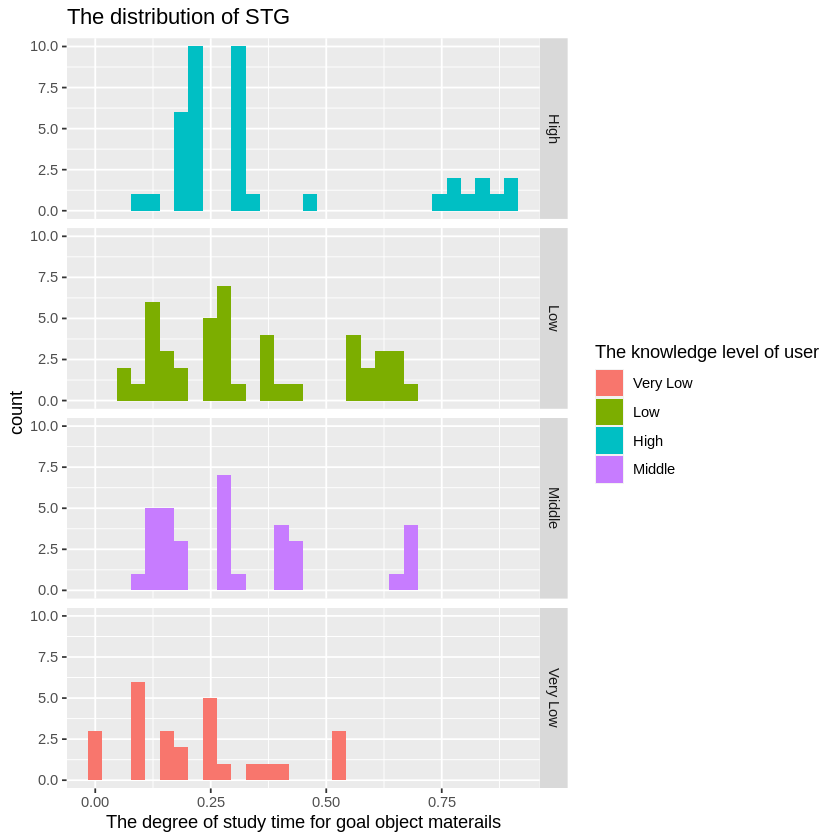

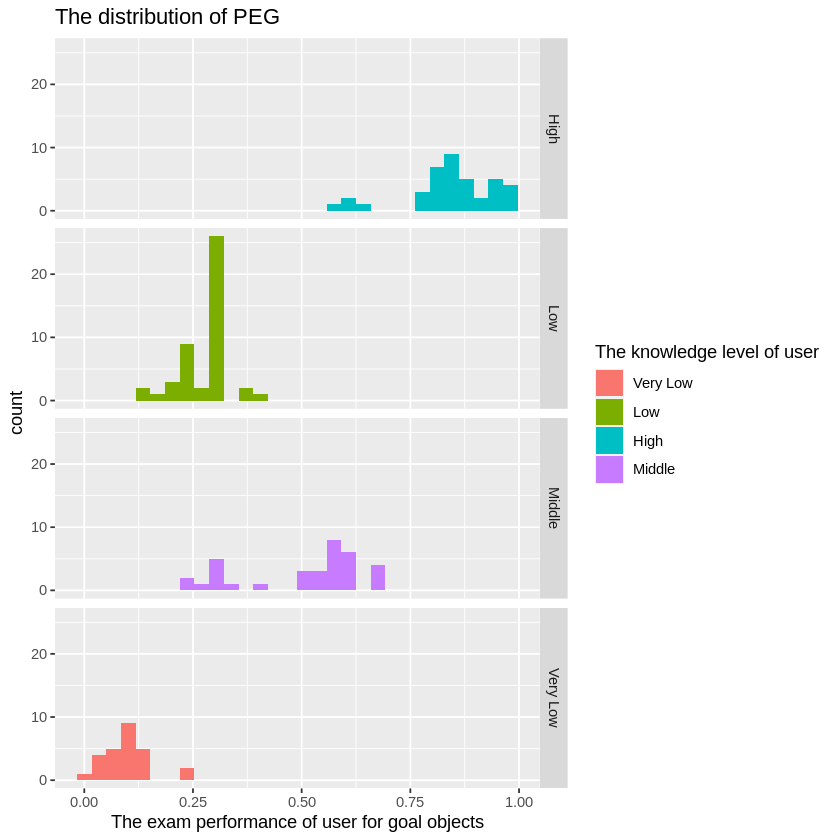

In [4]:
STG_PLOT <- ggplot(testing_data,aes(x = STG, fill = as_factor(UNS))) +
            geom_histogram() +
            facet_grid(rows = vars(UNS)) +
            labs(x = "The degree of study time for goal object materails", 
                 fill = "The knowledge level of user") +
            ggtitle("The distribution of STG")
STG_PLOT

PEG_PLOT <- STG_PLOT <- ggplot(testing_data,aes(x = PEG,fill = as_factor(UNS))) +
            geom_histogram() +
            facet_grid(rows = vars(UNS)) +
            labs(x = "The exam performance of user for goal objects", 
                 fill = "The knowledge level of user") +
            ggtitle("The distribution of PEG")
PEG_PLOT

### 3. Methods

<p style='text-align:justify;'> 
We will conduct our data analysis by creating a classification model using the k-nearest neighbors algorithm which can be done by following the steps below: <br>
1) Load the dataset <br>
2) Create a scatterplot <br>
3) Load the dataset <br>
4) Read the csv files into training and testing data set <br>
5) Use group_by and summarize function to find the number of counts for each UNS levels from “very low” to “high”<br>
6) Use summarize function to find the mean of all predictor variables <br>
7) Create STG and PEG histogram plots by stacking them vertically <br>
8) Color-code the UNS <br>
<br>
We will visualize the results by creating two sets of histograms, one for STG and the other for PEG. Within each set of histogram, UNS will be the y-axis as we separate each level by color-coding from “very low” to “high.” By stacking the histograms vertically, we can clearly see the distributions of different levels of STG and PEG. We will then be able to compare the relationship between STG and PEG associated with UNS. By using the k-nearest neighbors classification algorithm to predict UNS, we will find the K “nearest” observations from the training data set. 
</p>

### 4. Expected outcomes and significance

#### a. What do we expect to find?
<p style='text-align:justify;'> 
By developing a classification model to predict students' knowledge level, we expect to understand how relevant the two variables (STG and PEG) are in predicting the knowledge level.
<p>
    
#### b. What impact could such findings have?    
    
<p style='text-align:justify;'> 
Being able to predict students' knowledge level would really help to understand factors that may influence it. Furthermore, this will allow us to understand how to improve their knowledge level and consequently guide them to perform better in class. 
<p>
 
#### c. What future questions could this lead to?   
    
<p style='text-align:justify;'> 
One questions that this classification model may lead to is: 
Are there any other variables that are relevant in predicting students' knowledge level about the subject?
<p>